In [221]:
import scvelo as scv
import scanpy as sc
import pandas as pd
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [241]:
adata = scv.read('~/merged_avm_ec_only.h5ad')

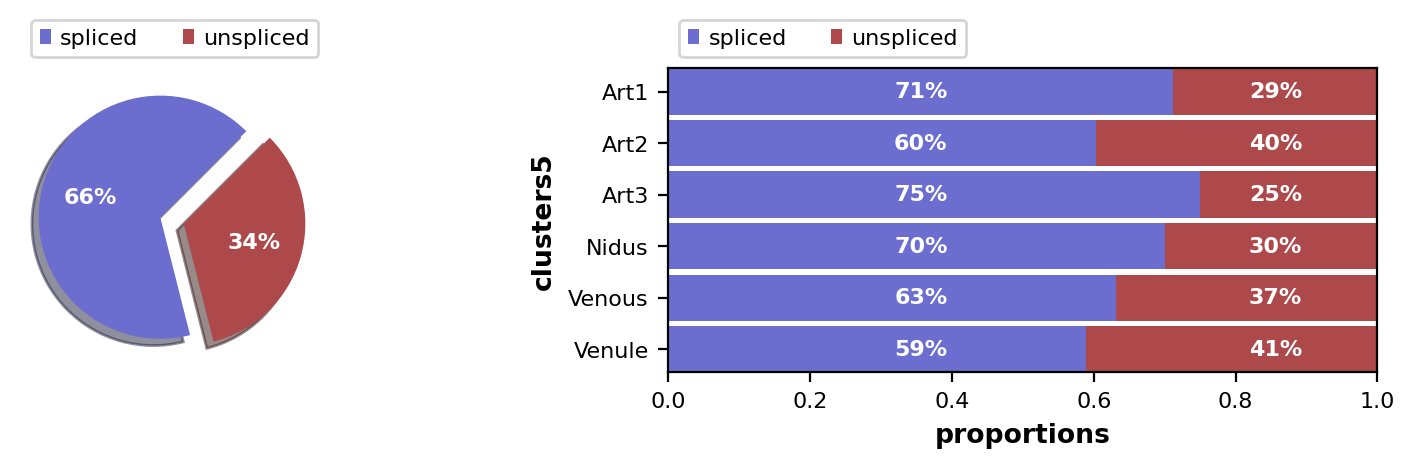

In [242]:
scv.pl.proportions(adata, groupby='clusters5')

In [243]:
adata2 = adata

Filtered out 49873 genes that are detected 30 counts (shared).
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


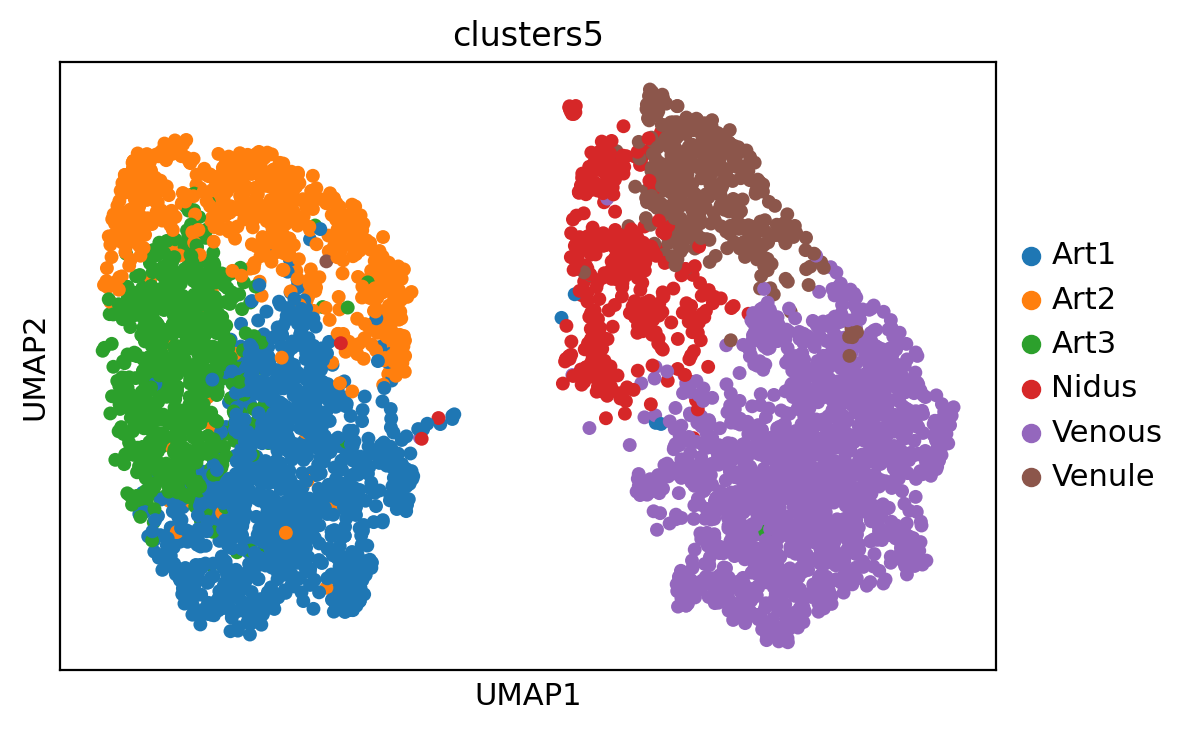

In [244]:
scv.pp.filter_and_normalize(adata2, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata2, n_pcs=30)
sc.tl.umap(adata2, min_dist=.3, spread = 1)
sc.pl.umap(adata2, color=['clusters5'], size=100)

In [245]:
scv.tl.recover_dynamics(adata2, n_jobs=32)
scv.tl.velocity(adata2, mode='dynamical')
scv.tl.velocity_graph(adata2)

recovering dynamics (using 32/128 cores)


  0%|          | 0/1441 [00:00<?, ?gene/s]

    finished (0:01:12) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


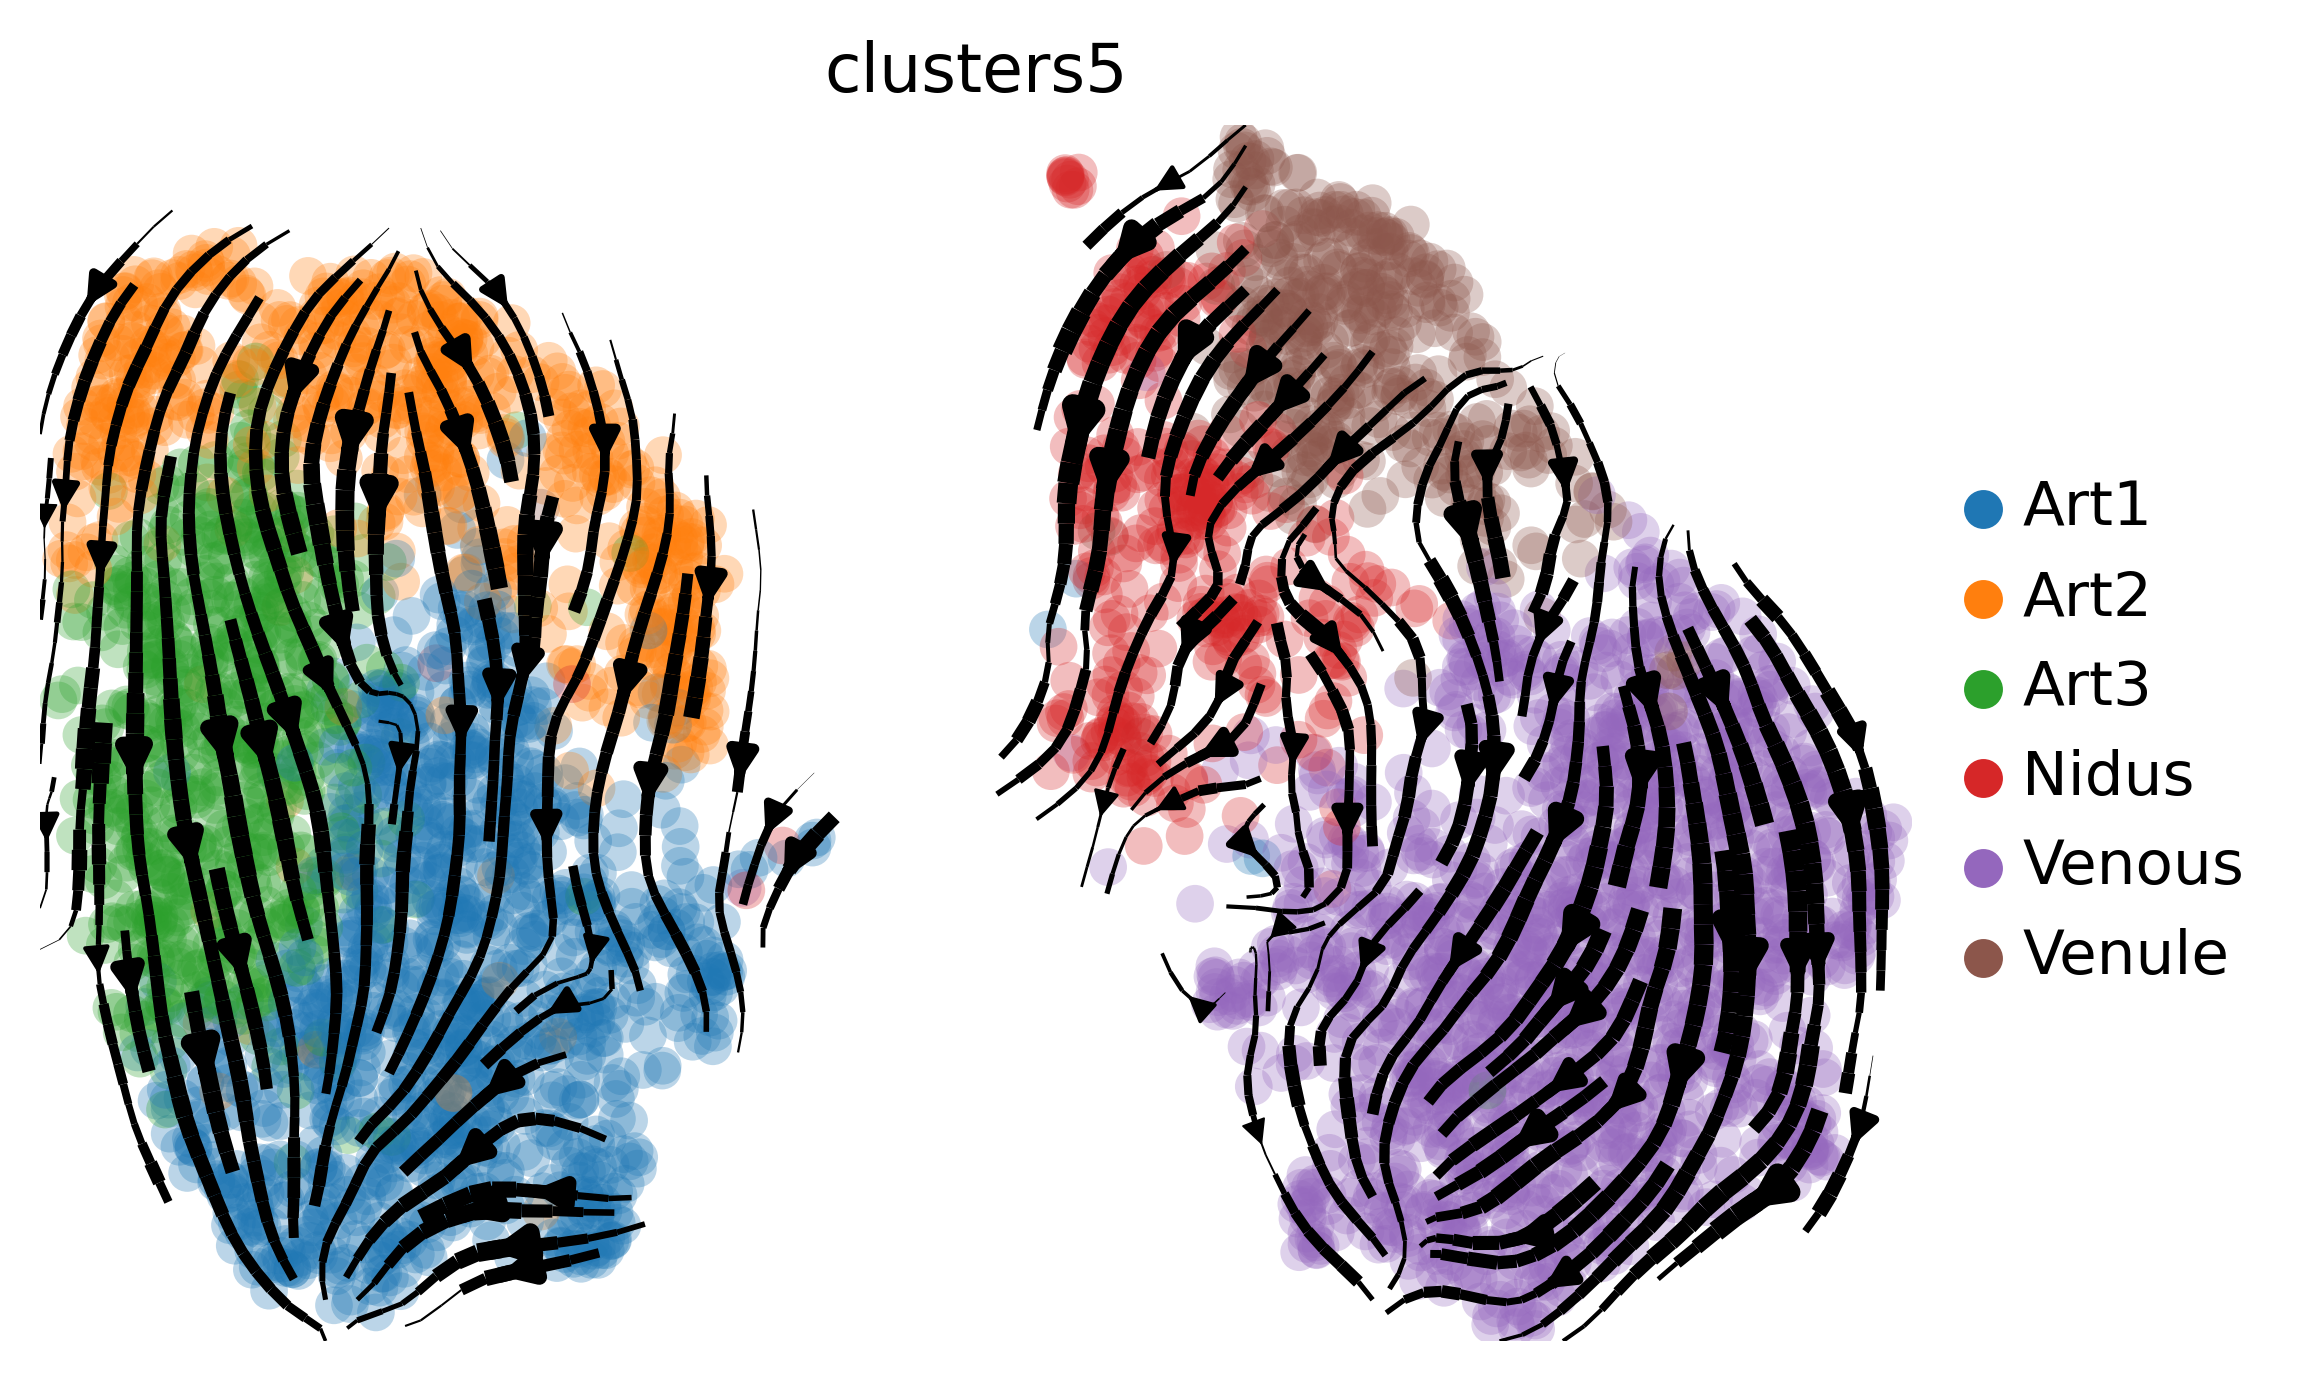

In [246]:
scv.pl.velocity_embedding_stream(adata2, basis='umap', legend_loc='right margin', dpi=200, linewidth=2, color='clusters5')#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

In [247]:
top_genes = adata2.var['fit_likelihood'].sort_values(ascending=False).index[:60]
scv.tl.differential_kinetic_test(adata2, var_names=top_genes, groupby='clusters5')

testing for differential kinetics
    finished (0:00:08) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pval_kinetics', p-values of differential kinetics (adata.var)


In [249]:
scv.tl.velocity(adata2, diff_kinetics=True)
scv.tl.velocity_graph(adata2)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:20) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_avm_ec_velo.svg


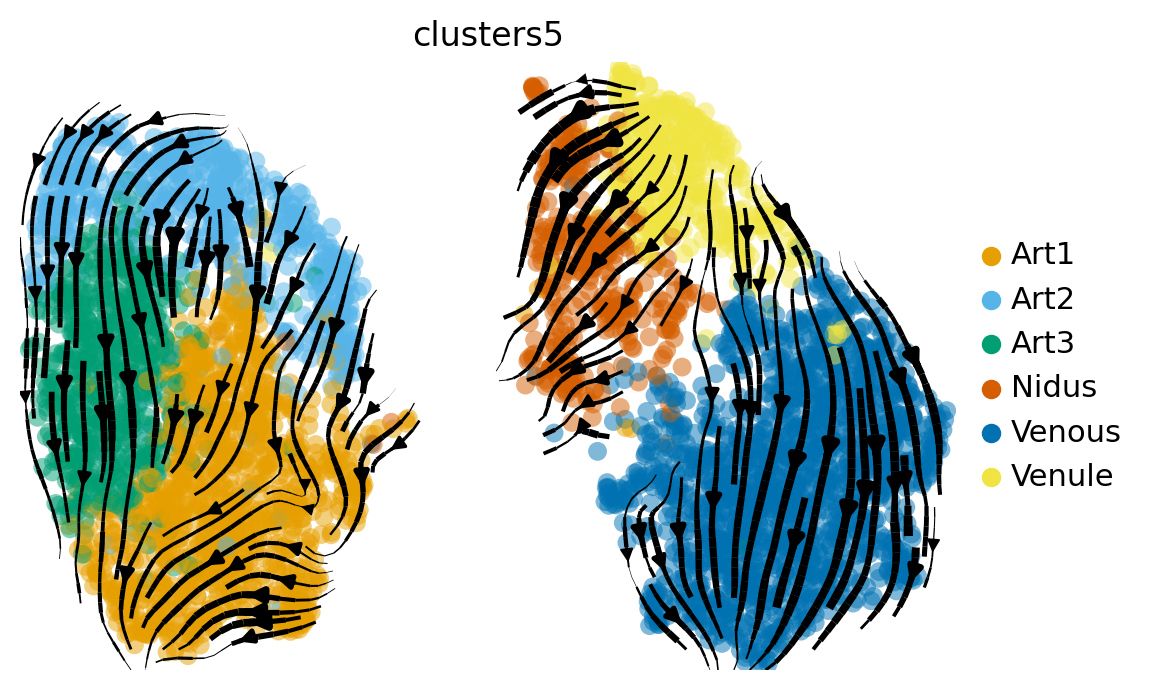

In [289]:
adata2.uns['clusters5_colors'] = ["#E69F00", "#56B4E9", "#009E73", "#D55E00", "#0072B2", "#F0E442"]
scv.pl.velocity_embedding_stream(adata2, basis='umap', legend_loc='right margin', dpi=100, 
                                 linewidth=2, alpha=.5, color='clusters5', save='avm_ec_velo.svg')# size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

saving figure to file ./figures/scvelo_avm_ec_samples.svg


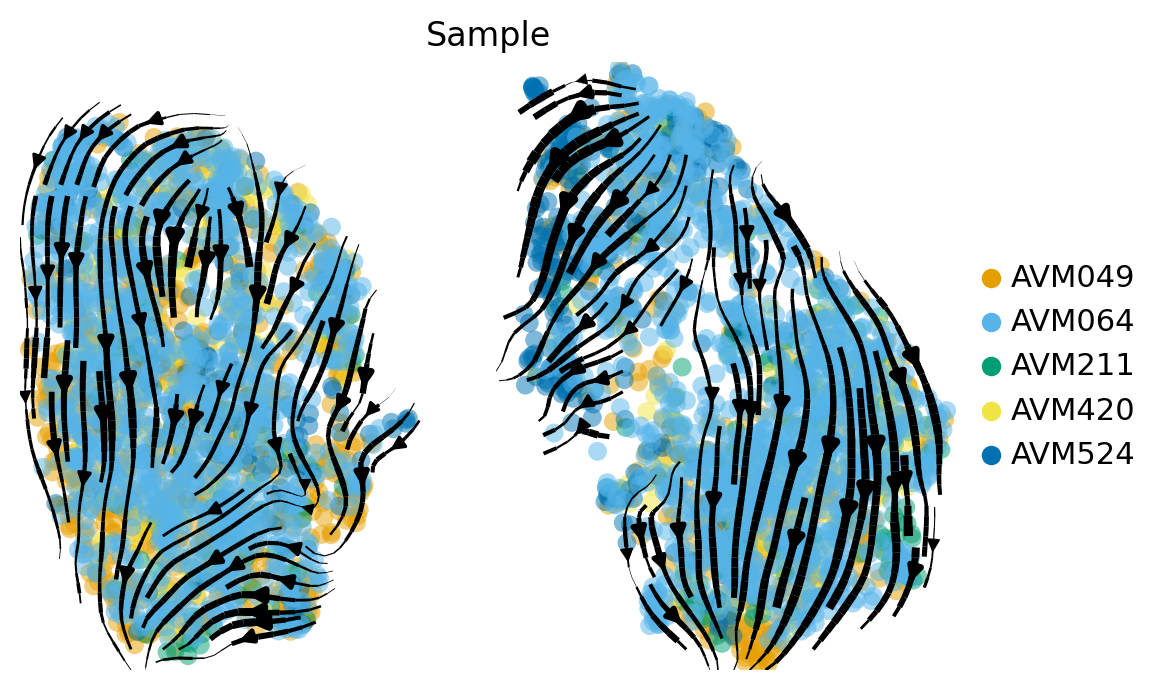

In [284]:
adata2.uns['Sample_colors'] = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=100, linewidth=2, 
                                 alpha=.5, color='Sample', save='avm_ec_samples.svg')# size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

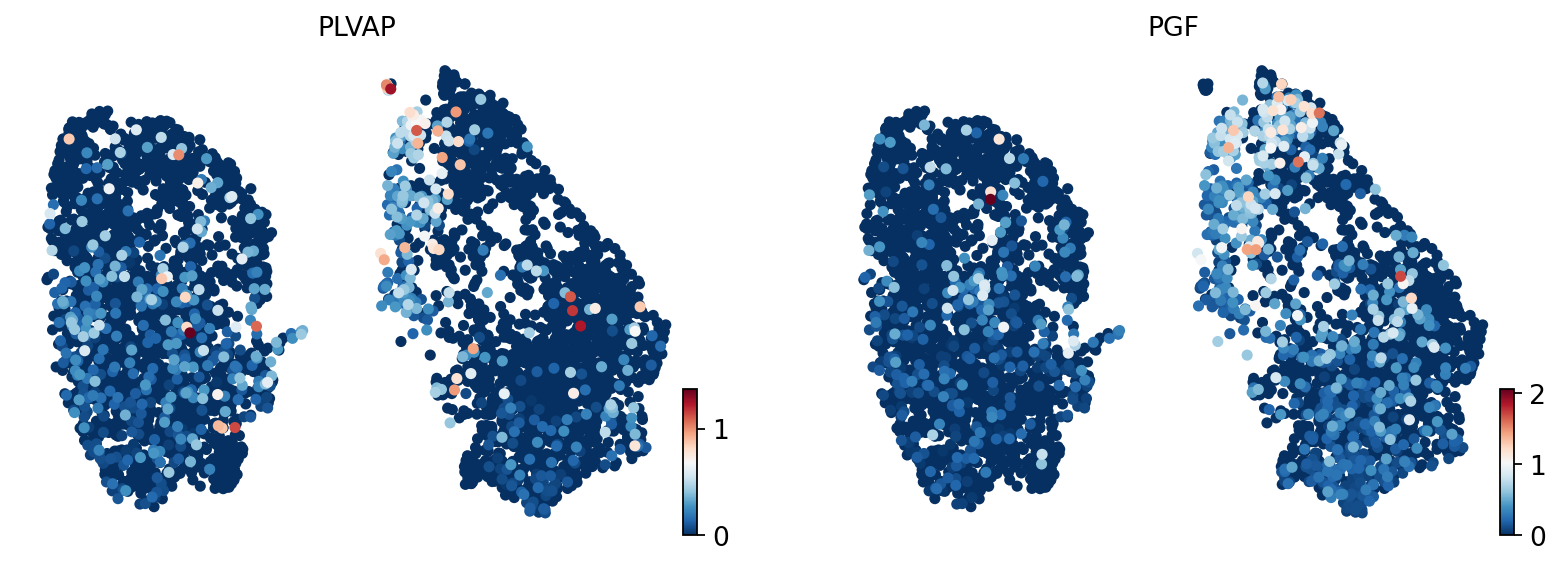

In [285]:
scv.pl.umap(adata2, color=["PLVAP","PGF"],size=100)

saving figure to file ./figures/scvelo_latent_time.svg


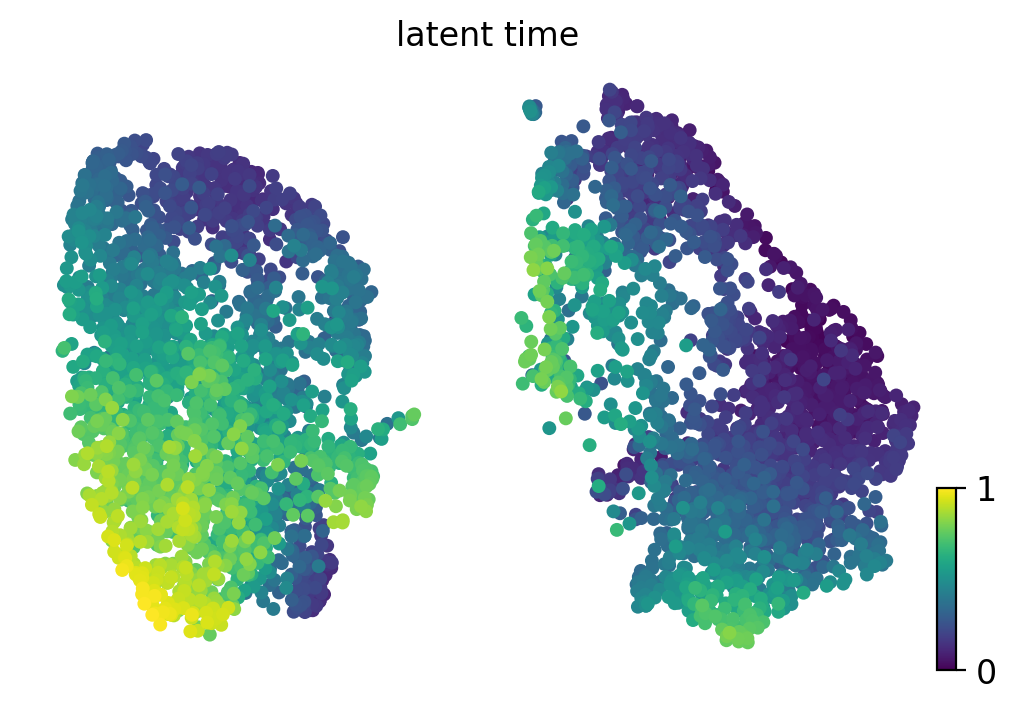

In [287]:
#scv.tl.latent_time(adata2)
scv.pl.scatter(adata2, color='latent_time', color_map='gnuplot', size=100, cmap='viridis', save='latent_time.svg')

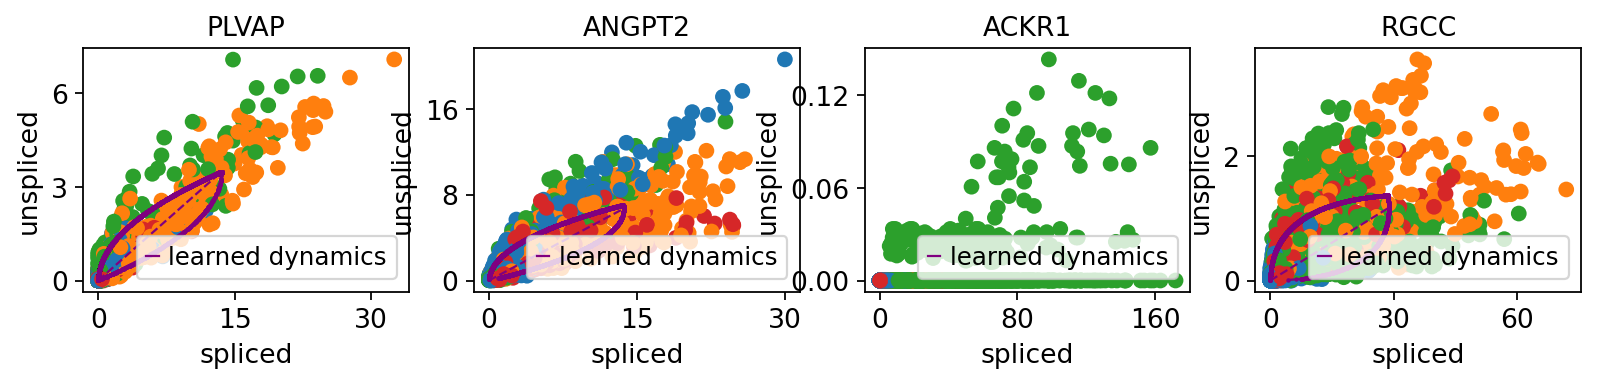

In [257]:
scv.pl.scatter(adata2, basis=['PLVAP','ANGPT2',"VWF","ACKR1","RGCC"], ncols=5, frameon=True,size=200)

In [269]:
scv.pp.normalize_per_cell(adata2, enforce=True)
scv.pp.log1p(adata2)

Normalized count data: X, spliced, unspliced.


saving figure to file ./figures/scvelo_avm_ec_pseudo.svg


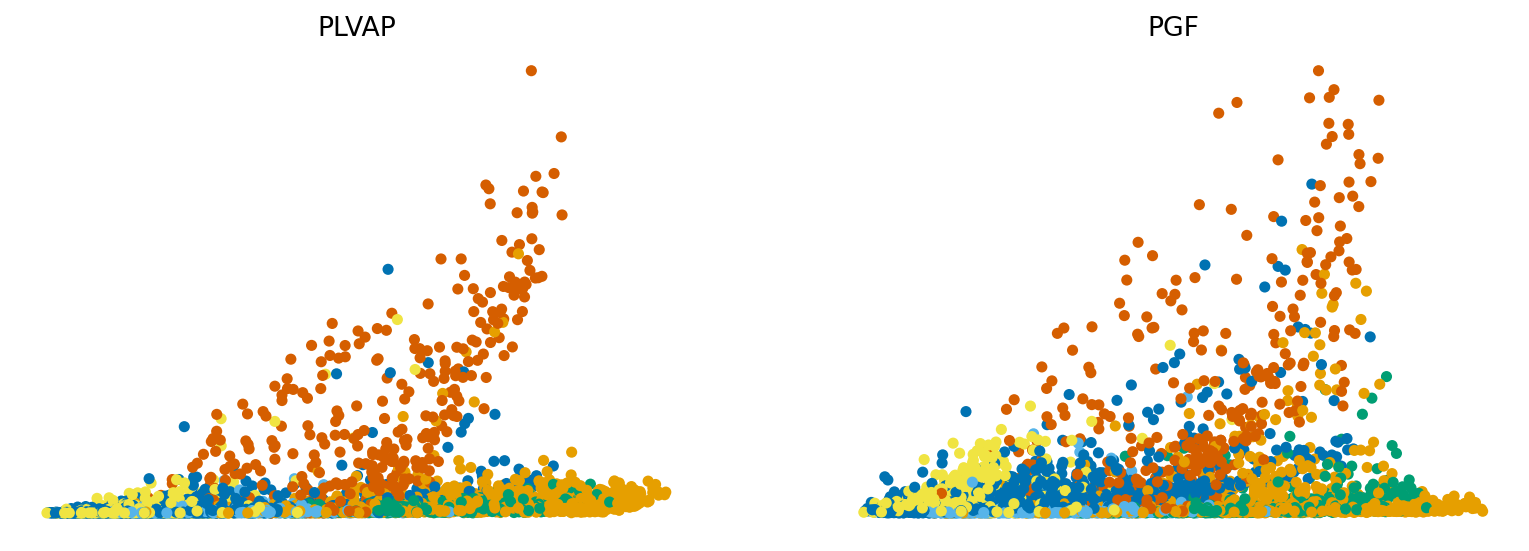

In [292]:
scv.pl.scatter(adata2,x='latent_time', y=['PLVAP',"PGF"],color ="clusters5",use_raw =False,frameon=False, size=100, save='avm_ec_pseudo.svg')